# Homework 5 Problem 2

AMath 584, Autumn Quarter 2016.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Define a function `f` (returning the function `f(x)`) and `fprime` (returning the Jacobian matrix `J(x)`):

In [3]:
def f(x):
    f0 = x[0]**2 + x[1]**2 - 9.
    f1 = (x[0]-1.)**2 + (x[1]+2)**2 - 4.
    return array([f0,f1])

def fprime(x):
    f00 = 2*x[0]
    f01 = 2*x[1]
    f10 = 2*(x[0]-1.)
    f11 = 2*(x[1]+2.)
    return array([[f00,f01],[f10,f11]])

The Newton iteration:

In [7]:
def newton(x0):
    max_iters = 10
    tolerance = 1e-14
    x = x0
    fx = f(x)
    for k in range(max_iters):
        J = fprime(x)
        delta = solve(J,-fx)
        x = x + delta
        fx = f(x)
        fxnorm = norm(fx,inf)
        delnorm = norm(delta,inf)
        print "x = %20.15f, %20.15f, ||delta|| = %8.4e, ||f(x)|| = %8.4e" \
                % (x[0],x[1],delnorm,fxnorm)
        if min(fxnorm, delnorm) < tolerance:
            break
    return x
    

Use this with two different initial guesses to determine the two solutions and save these as `xa` and `xb`:

In [8]:
x0 = array([3,-1.])
print "\nFirst initial guess \nx0= %20.15f, %20.15f" % (x0[0],x0[1])
xa = newton(x0)

x0 = array([-1,-3])
print "\nSecond initial guess \nx0= %20.15f, %20.15f" % (x0[0],x0[1])
xb = newton(x0)


First initial guess 
x0=    3.000000000000000,   -1.000000000000000
x =    2.800000000000000,   -1.100000000000000, ||delta|| = 2.0000e-01, ||f(x)|| = 5.0000e-02
x =    2.788888888888889,   -1.105555555555556, ||delta|| = 1.1111e-02, ||f(x)|| = 1.5432e-04
x =    2.788854382332643,   -1.105572808833678, ||delta|| = 3.4507e-05, ||f(x)|| = 1.4884e-09
x =    2.788854381999831,   -1.105572809000084, ||delta|| = 3.3281e-10, ||f(x)|| = 1.7764e-15

Second initial guess 
x0=   -1.000000000000000,   -3.000000000000000
x =   -0.800000000000000,   -2.900000000000000, ||delta|| = 2.0000e-01, ||f(x)|| = 5.0000e-02
x =   -0.788888888888889,   -2.894444444444444, ||delta|| = 1.1111e-02, ||f(x)|| = 1.5432e-04
x =   -0.788854382332643,   -2.894427191166322, ||delta|| = 3.4507e-05, ||f(x)|| = 1.4884e-09
x =   -0.788854381999832,   -2.894427190999916, ||delta|| = 3.3281e-10, ||f(x)|| = 1.7764e-15


Note the quadratic convergence!

Plot the solutions along with the circles to check that these make sense:

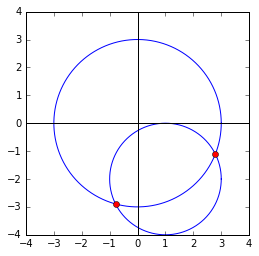

In [6]:
theta = linspace(0,2*pi,500)
x = 3*cos(theta)
y = 3*sin(theta)
plot(x,y,'b')
x = 1 + 2*cos(theta)
y = -2 + 2*sin(theta)
plot(x,y,'b')
xlimits = [-4,4]
ylimits = [-4,4]
plot(xlimits, [0,0],'k')
plot([0,0], ylimits,'k')

plot([xa[0],xb[0]], [xa[1],xb[1]], 'ro')
xlim(xlimits)
ylim(ylimits)
axis('scaled');
savefig('circles.png',bbox_inches='tight')